# The collapse of the Phillips Curve?

**Motivation for the project and relevans to economics**

This project is our data project where we create a Philips curve from historical data on inflation and employment in the US. In the 1960s the U.S. data showed a good correlation between unemplyment and inflation. However in the 1970s and onwards that relationship disappeared. We found it interesting to recreate the Philips curve from the 1960s with U.S. data but then also look at other periods in time to see if the correlation between inflation and unemployment has actually disappeared - this is not meant as a causal analysis, but just to explore an interesting concept that was widely belived to be true in the economics profession.

**Structure of the project**

To conduct our analysis, we utilize data sourced from both FRED and DST, covering inflation and unemployment rates for both the United States, Japan and Denmark. Our aim is to span the longest available time periods, hence we incorporate data from both sources to include Danish economic indicators.

We explore the dataset by first checking data is loaded correctly by pulling 10 random values to inspect, then we plot the individual dataset. We then perform the analysis plotting the rate of unemployment compared to the inflation rate and thereby creating the Phillips curve. At first we focus on the 

# Project setup

In [135]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Getting data from API calls

## Getting U.S. Data (from FRED)

### Inflation U.S.

In [136]:
# Importing DataHelper to get data from API calls
import DataHelper

# Get data from API call
inflation_annual_US = DataHelper.inflation_annual_US()

# Display 10 random elements
#inflation_annual_US.head(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

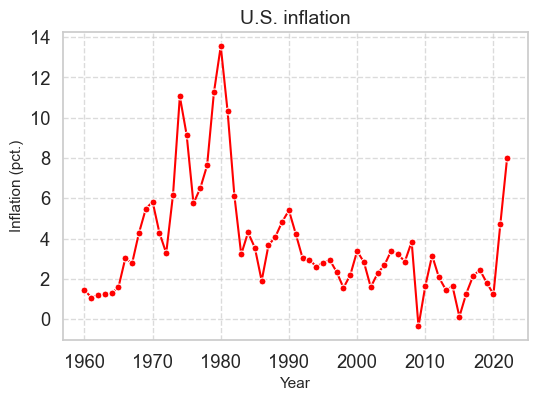

In [137]:
# Suppress FutureWarning about use_inf_as_na
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the GraphHelper class to reuse the graph generating code
import GraphHelper

# Plot data
GraphHelper.line_plot_with_labels(
    inflation_annual_US, 
    "U.S. inflation", 
    "Year", 
    "Inflation (pct.)",
    "Year",
    "Inflation_US",
    color="red")

We notice an upward trend in the inflation rates in the period we focus on for our intitial assesment of the validity of the Phillips Curve between 1960 and 10 years forward. The trend is then descending for two years having a steep rise in the inflation rate in the middle of the 1970s. After reaching a rate of almost 14 pct. We observe another descend, We then observe that the curve exhibits minimal fluctuations between the mid-1980s and up to the year 2020.

### Unemployment U.S.

In [138]:
# Get data from API call
unemployment_annual_US = DataHelper.unemployment_annual_US()

# Display 10 random elements
#unemployment_annual_US.head(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

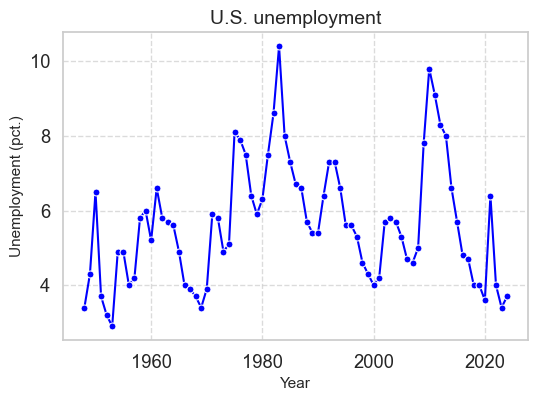

In [139]:
# Plot data
GraphHelper.line_plot_with_labels(
    unemployment_annual_US, 
    "U.S. unemployment", 
    "Year", 
    "Unemployment (pct.)",
    "Year",
    "Unemployment_US",
    color="blue")

The curve shows minor fluctuations between approximately 1950 and 1970. However, in the subsequent decades, certain years experience extremely high unemployment rates, notably in 1983, when the curve peaks at over 10 percent.

## Getting DK Data (from DST and FRED)

### Inflation DK

In [140]:
# Importing DataHelper to get data from API calls
import DataHelper

# Get inflation data from API call
inflation_annual_DK = DataHelper.inflation_annual_DK()

# Show 10 random elements
#inflation_annual_DK.sample(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

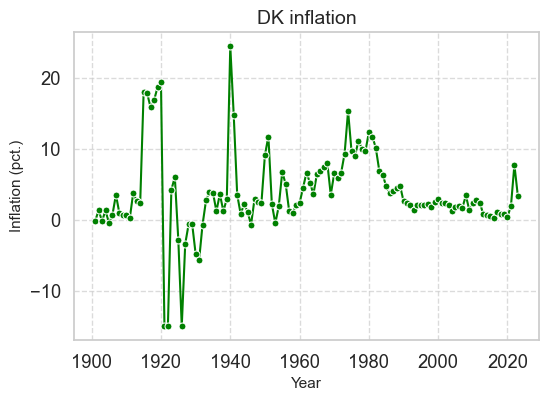

In [141]:
# Plot data
GraphHelper.line_plot_with_labels(
    inflation_annual_DK, 
    "DK inflation", 
    "Year", 
    "Inflation (pct.)",
    "Year",
    "Inflation_DK",
    color="green")

Focusing on the same period as shown for the U.S. Inflation(1960-2023) we see a quite similar development, except the inflation rate for this period peaks earlier in DK in around 1974.

### Unemployment DK


In [142]:
# Get inflation data from API call
unemployment_annual_DK = DataHelper.unemployment_annual_DK()

# Show 10 random elements
#unemployment_annual_DK.sample(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

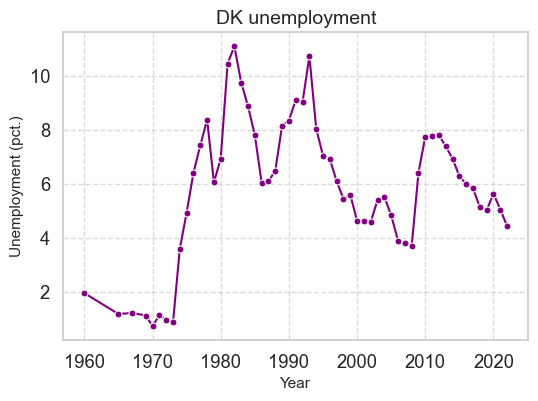

In [143]:
# Plot data
GraphHelper.line_plot_with_labels(
    unemployment_annual_DK, 
    "DK unemployment", 
    "Year", 
    "Unemployment (pct.)",
    "Year",
    "Unemployment_DK",
    color="purple")

According to this graph, Denmark had almost no fulltime unemployed individuals before 1973. However, from that year onward, the unemployment rate fluctuates between around 4 percent to almost 12 percent until the year 2000. Between 2000 and 2023, the unemployment rate remains between 4 percent to 8 percent

## Getting Japan Data (from FRED)

### Inflation Japan

In [144]:
# Getting unemployment rate from API call
inflation_annual_JPN = DataHelper.inflation_annual_JPN()

inflation_annual_JPN.sample(5)

,Year,Inflation_JPN
30,1990,3.078516
35,1995,-0.127899
5,1965,6.655991
19,1979,3.701851
11,1971,6.395349


#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

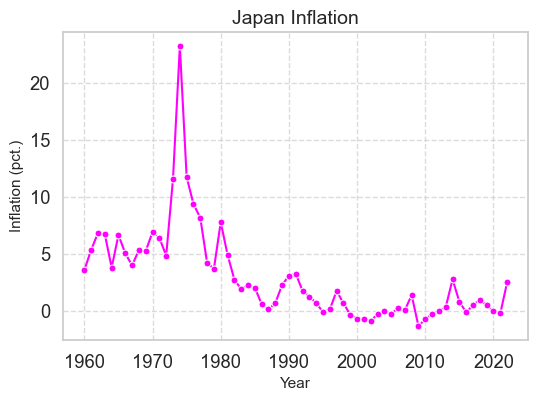

In [145]:
# Plot data
GraphHelper.line_plot_with_labels(
    inflation_annual_JPN, 
    "Japan Inflation", 
    "Year", 
    "Inflation (pct.)",
    "Year",
    "Inflation_JPN",
    color="magenta")

Just as observed in both the U.S. and DK graphs, there is a spike in the inflation rate around the mid-1970s, followed by a decline in the subsequent years. During this period, we also notice low fluctuations ranging between -2 percent to around 3 percent.

### Unemployment Japan

In [146]:
# Getting unemployment rate from API call
unemployment_annual_JPN = DataHelper.unemployment_annual_JPN()

unemployment_annual_JPN.sample(5)

,Year,Unemployment_JPN
62,2022,2.600000
42,2002,5.375000
3,1963,1.283333
6,1966,1.308333
39,1999,4.683333


#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

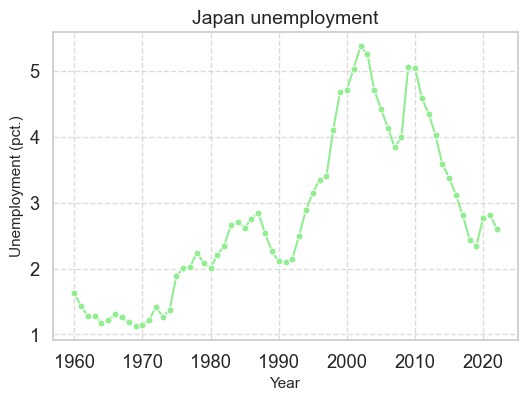

In [147]:
# Plot data
GraphHelper.line_plot_with_labels(
    unemployment_annual_JPN, 
    "Japan unemployment", 
    "Year", 
    "Unemployment (pct.)",
    "Year",
    "Unemployment_JPN",
    color="lightgreen")

In the years leading up to 1970, the unemployment rate was extremely low, similar to Denmark. However, after this point, we observe a steadily rising curve with brief periods of minor decreases up to the year 1990, and another decrease up to the year 2007.

# Merge datasets to one big dataset

### Merging and descriptive statistics

In [148]:
# Calling the merged data function
merged_df = DataHelper.merged_data()

# Showing a sample of the merged data df
merged_df.sample(10)

,Year,Inflation_US,Unemployment_US,Inflation_DK,Unemployment_DK,Inflation_JPN,Unemployment_JPN
54,2014,1.622223,6.6,0.6,6.925798,2.759227,3.591667
6,1966,3.015075,4.0,6.8,NaN,5.040832,1.308333
12,1972,3.272278,5.8,6.6,0.966793,4.843517,1.416667
32,1992,3.028820,7.3,2.1,9.026292,1.760283,2.150000
35,1995,2.805420,5.6,2.1,7.038228,-0.127899,3.150000
39,1999,2.188027,4.3,2.5,5.586690,-0.341297,4.683333
60,2020,1.233584,3.6,0.4,5.636424,-0.024996,2.775000
49,2009,-0.355546,7.8,1.3,6.409418,-1.352837,5.066667
8,1968,4.271796,3.7,8.0,NaN,5.339433,1.183333
43,2003,2.270095,5.8,2.1,5.406727,-0.256542,5.258333


In [149]:
# Excluding year-column for purpose of summary statistics
columns_to_include = merged_df.iloc[:, 1:7]

# Formatting & displaying summary statistics for each country
statistics = columns_to_include.describe().style.format('{:.1f}')
display(statistics)

,Inflation_US,Unemployment_US,Inflation_DK,Unemployment_DK,Inflation_JPN,Unemployment_JPN
count,63.0,63.0,63.0,57.0,63.0,63.0
mean,3.8,5.9,4.5,5.8,2.9,2.8
std,2.8,1.6,3.5,2.6,4.1,1.3
min,-0.4,3.4,0.3,0.7,-1.4,1.1
25%,1.9,4.8,1.9,4.6,0.1,2.0
50%,3.0,5.7,2.9,6.0,1.8,2.6
75%,4.5,6.7,6.6,7.7,4.9,3.7
max,13.5,10.4,15.3,11.1,23.2,5.4


In [150]:
#Interactive boxplots - descriptive data visualization

def plot_boxplots(column_name1, column_name2):
    # Creating subplots and setting figsize
    fig, axes = plt.subplots(1, 2, figsize=(6, 4))

    # Boxplot design commands
    boxplot_params = dict(
        boxprops=dict(color='red', linewidth=3),
        whiskerprops=dict(color='black', linewidth=2),
        capprops=dict(color='black', linewidth=2),
        medianprops=dict(color='black', linewidth=2,linestyle='--'),
        flierprops=dict(marker='o', markersize=4, markerfacecolor='red', markeredgecolor='black')
    )
    # First boxplot w. specified design and y-/x-axis
    axes[0].boxplot(merged_df[column_name1].dropna(),**boxplot_params)
    axes[0].set_title(f'{column_name1}')
    axes[0].set_ylabel('%')
    axes[0].set_ylim(-5,20)
    axes[0].set_xticklabels([])

    # Second boxplot w. specified design and y-/x-axis
    axes[1].boxplot(merged_df[column_name2].dropna(), **boxplot_params)
    axes[1].set_title(f'{column_name2}')
    axes[1].set_ylabel('%')
    axes[1].set_ylim(-5,20)
    axes[1].yaxis.set_ticks_position('right')
    axes[1].yaxis.set_label_position('right')
    axes[1].set_xticklabels([])

    plt.show()

# Create dropdown widgets for selecting what data to display and compare
column_dropdown1 = widgets.Dropdown(
    options=['Inflation_US', 'Unemployment_US', 'Inflation_DK', 'Unemployment_DK','Inflation_JPN','Unemployment_JPN'],
    value='Inflation_US',
    description='Left Plot'
)

column_dropdown2 = widgets.Dropdown(
    options=['Inflation_US', 'Unemployment_US', 'Inflation_DK', 'Unemployment_DK','Inflation_JPN','Unemployment_JPN'],
    value='Inflation_DK',
    description='Right Plot'
)

# Create interactive boxplots
widgets.interact(plot_boxplots, column_name1=column_dropdown1, column_name2=column_dropdown2)

interactive(children=(Dropdown(description='Left Plot', options=('Inflation_US', 'Unemployment_US', 'Inflation…

<function __main__.plot_boxplots(column_name1, column_name2)>

# Phillips-Curve with U.S. Data from the 1960s

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

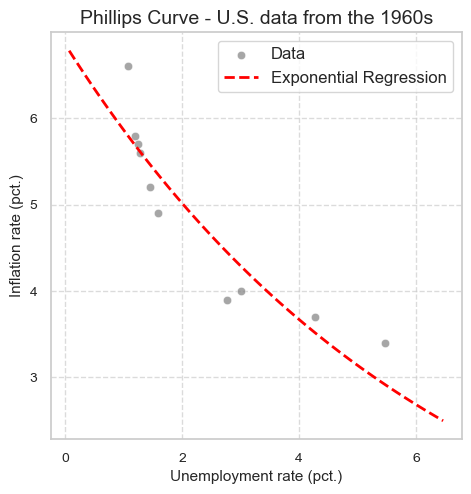

In [151]:
import GraphHelper

# Filter data for years between 1960 and 1970
philips_df_1960s = merged_df[(merged_df['Year'] < 1970)]
#merged_df.tail(20)

#Plot data
GraphHelper.plot_philips_curve_static(
    philips_df_1960s, 
    "Inflation_US",
    "Unemployment_US",
    "Phillips Curve - U.S. data from the 1960s")

The above Phillips curve is created with U.S. data from the 1960s. It can be seen that there is a relationship between the inflation and the unemployment rate. However after the 1960s the Phillips curve started to break down and the correlation between the two variables disappeared. In the rest of this project we've created a bunch of interactive plots where the reader can see if there are any other points in history where there has been as clear a relationship between the inflation and the unemployment rate as in the 1960s.

# Trying to find the Phillips Curve in newer data

## Looking at the U.S. and Denmark in an interactive plot

The code below generates an interactive plot where it's possible to plot a Phillips-curve with data from different years. It's also possible to look at data from different countries - Denmark and the U.S. Beware that there are missing data for Denmark in the 1960s for some of the years, but not all of them.

In [152]:
# Implement an interactive Phillips Curve
def _plot_phillips_curve(dataframe, variable, years):

    # Filter observations where the year is not in the interval years
    dataframe = dataframe[dataframe['Year'] > years[0]]
    dataframe = dataframe[dataframe['Year'] < years[1]]

    # Switch like functionality to change country data
    xVariable = "Inflation_US"
    yVariable = "Unemployment_US"

    if variable == "U.S.":
        xVariable = "Inflation_US"
        yVariable = "Unemployment_US"
    elif variable == "Denmark":
        xVariable = "Inflation_DK"
        yVariable = "Unemployment_DK"
    elif variable == "Japan":
        xVariable = "Inflation_JPN"
        yVariable = "Unemployment_JPN"


    #Plot data
    GraphHelper.plot_philips_curve_static(
        dataframe, 
        xVariable,
        yVariable,
        f"Phillips Curve - {variable} - ({years[0]} - {years[1]})")


widgets.interact(_plot_phillips_curve, 
dataframe = widgets.fixed(merged_df),
variable = widgets.Dropdown(
    description='Country', 
    options=['U.S.','Denmark', 'Japan'], 
    value='Denmark'),
years=widgets.IntRangeSlider(
    description="Years",
    min=1961,
    max=2022,
    value=[1980, 2010],
    continuous_update=False,
))

interactive(children=(Dropdown(description='Country', index=1, options=('U.S.', 'Denmark', 'Japan'), value='De…

<function __main__._plot_phillips_curve(dataframe, variable, years)>

Time Periods of interest:
US

DK

Japan

## Philips Curve over time

### Comparing the empirical Philips-curve between countries over time

The code below provides an interactive scatterplot. The scatterplot shows the inflation and unemployment for three analyzed countries, US, DK and JPN for a chosen period. For each chosen period, an exponential regression is made to compare the empirical Philips-curve to the theoretical Philips curve. <br> **GOAL:** To compare empirical Philips-curve between countries over time.
<br> **OBS:** If NaN-data is included in the chosen period, no regression is fitted to the data

In [153]:
#Importing packages necessary for interactive Philips-curve
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt

# Exponential function
def exponential_func_multiscatter(x, a, b):
        return a * np.exp(b * x)

# Function to create scatter plot for each year range with exponential fits
def plot_scatter_pairs_multiscatter(years):
        plt.figure(figsize=(7, 7))

# Filter DataFrame based on selected year range
        df_filtered = merged_df[(merged_df['Year'] >= years[0]) & (merged_df['Year'] <= years[1])]

# Plot US data and make sure NaNs are not regressed upon.
        if not df_filtered['Unemployment_US'].isnull().all() and not df_filtered['Inflation_US'].isnull().all():
                sns.scatterplot(x='Unemployment_US', y='Inflation_US', data=df_filtered, color='blue', label='US')

# Calculate exponential fit for US data, except if NANs are included in chosen year range (ie. resulting in RunTimeError)
                try:
                        popt_us, pcov = curve_fit(exponential_func_multiscatter, df_filtered['Unemployment_US'], df_filtered['Inflation_US'])
                        x_values_us = np.linspace(df_filtered['Unemployment_US'].min(), df_filtered['Unemployment_US'].max(), 100)
                        y_values_us = exponential_func_multiscatter(x_values_us, *popt_us)
                        plt.plot(x_values_us, y_values_us, linestyle='--', color='blue', label='US Exponential Fit')
                except RuntimeError:
                        pass

# Plot DK data and make sure NaNs are not regressed upon.
        if not df_filtered['Unemployment_DK'].isnull().all() and not df_filtered['Inflation_DK'].isnull().all():
                sns.scatterplot(x='Unemployment_DK', y='Inflation_DK', data=df_filtered, color='red', label='DK')

# Calculate exponential fit for DK data, except if NANs are included in chosen year range (ie. resulting in RunTimeError)
                try:
                        popt_dk, _ = curve_fit(exponential_func_multiscatter, df_filtered['Unemployment_DK'], df_filtered['Inflation_DK'])
                        x_values_dk = np.linspace(df_filtered['Unemployment_DK'].min(), df_filtered['Unemployment_DK'].max(), 100)
                        y_values_dk = exponential_func_multiscatter(x_values_dk, *popt_dk)
                        plt.plot(x_values_dk, y_values_dk, linestyle='--', color='red', label='DK Exponential Fit')
                except RuntimeError:
                        pass

# Plot JPN data and make sure NaNs are not regressed upon.
        if not df_filtered['Unemployment_JPN'].isnull().all() and not df_filtered['Inflation_JPN'].isnull().all():
                sns.scatterplot(x='Unemployment_JPN', y='Inflation_JPN', data=df_filtered, color='gray', label='JPN')

# Calculate exponential fit for DK data, except if NANs are included in chosen year range (ie. resulting in RunTimeError)
                try:
                        popt_jp, _ = curve_fit(exponential_func_multiscatter, df_filtered['Unemployment_JPN'], df_filtered['Inflation_JPN'])
                        x_values_jp = np.linspace(df_filtered['Unemployment_JPN'].min(), df_filtered['Unemployment_JPN'].max(), 100)
                        y_values_jp = exponential_func_multiscatter(x_values_jp, *popt_jp)
                        plt.plot(x_values_jp, y_values_jp, linestyle='--', color='gray', label='JP Exponential Fit')
                except RuntimeError:
                        pass

# Add title and labels
        plt.title(f'Unemployment, inflation & exp.fit for {years[0]}-{years[1]}')
        plt.xlabel('Unemployment Rate (pct.)')
        plt.ylabel('Inflation Rate (pct.)')

# Add legend
        plt.legend()

# Show plot
        plt.show()

# Create interaction
years_slider = widgets.IntRangeSlider(
    min=merged_df['Year'].min(),
    max=merged_df['Year'].max(),
    description='Year'
    )
widgets.interact(plot_scatter_pairs_multiscatter, years=years_slider)

interactive(children=(IntRangeSlider(value=(1975, 2006), description='Year', max=2022, min=1960), Output()), _…

<function __main__.plot_scatter_pairs_multiscatter(years)>